In [20]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [8]:
def deutsch_function( case):
    # in this function we will implement a simple input function or a orcle depending on the case, it can be balanced or constant.
    
    if case not in [1,2,3,4]:
        raise ValueError(' case must be between 1 and 4 (inclusive)')
        
    else:
        f = QuantumCircuit(2)
        if case in [2,3]:
            f.cx(0,1)
        else:
            f.x(1)
        return f

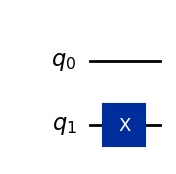

In [10]:
display(deutsch_function(1).draw())

In [18]:
def compile_circuit( deutsch_function):
    # this function puts together the oracle/input function circuit and the deutsch algorithm circuit
    
    qc = QuantumCircuit(2,1)
    qc.x(1)  # lets make the second qubit 1
    qc.h(range(2)) # we add haddamard gate to both the qubits
    qc.barrier()
    qc.compose(deutsch_function, inplace = True)
    qc.barrier()
    qc.h(0) # add a h gate to the first qubit
    qc.measure(0, 0)
    
    return qc
   

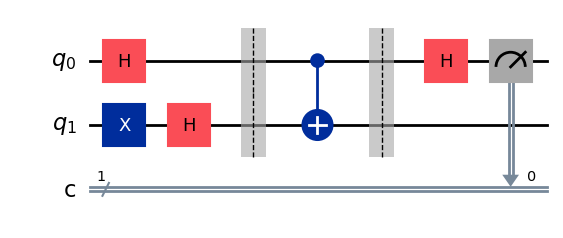

In [19]:
compile_circuit(deutsch_function(2)).draw()

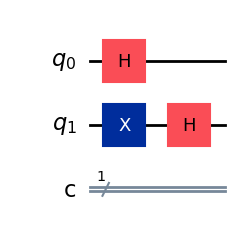

In [17]:
qc = QuantumCircuit(2,1) # testing
qc.x(1)
qc.h(range(2))
qc.draw()


In [ ]:
def deutsch_algorithm(deutsch_function):
    # this function will run the circuit and output if the oracle is constant or balanced.
    qc = compile_circuit(deutsch_function)
    result = AerSimulator().run(qc, shots =1, memory = True).result()
    if result.get_memory()[0] == '0':
        print('t
    